# Capstone Project - Car Severity Analysis model (Week 2)
### Applied Data Science Capstone by IBM/Coursera

_by Jesús Antonio Molero Cano_

## Table of contents
* [1. Introduction: Problem definition](#introduction)
* [2. Data](#data)
    * [2.1 Data preparation](#preparation)
    * [2.2 Data relationships](#relationships)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
    * [4.1 Decision Tree model](#tree)
    * [4.2 Logistic regression model](#logistic)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)

## 1. Introduction. Problem definition <a name="introduction"></a>

In this project we create a model able to define the severity of an accident thanks to a big set of data from the city of Seattle. However, the conclusions and the model can be applied to other several cities with similar characteristics in America, Europe, Asia, Africa or any other part of the world.

The results of this project are very useful in car accident prevention, and they may save the lives of many citizens. Just to be aware of the magnitude of mortal accidentes, car accidents were responsible of 33,654 deaths just in 2018 in the US and of an average of 1.35 million people deaths worldwide each year. Those traumatic statistics are a just a sign of the importance of this issue globally. 

Moreover, these results may be useful to Law Enforcement in their activities of traffic control. The results may indicate the conditions that are likely to cause an accident, what may help in the prevention activities.

## 2. Data <a name="data"></a>

Based on definition of our problem, we will create a model able to predict severity of an accident giving certain conditions:
* External conditions: Weather, road condition, light at the time of the accident, road state.
* Internal conditions: number of vehicles in the accident, speeding, drivers/people in the accident, pedrastians involved, alcohol influence and type of crash intercourse.

The CSV file given by the IBM Coursera course is very detailed an it offers a good source for developing this project. The raw data reachs almost 20000 rows, this quantity is enough in order to accomplish the task. Not all the attributes will be used in the project, this is the reason why some of them are being deleted.
The Data given by IBM will be prepared and filtered in the following process. The empty data will be filled with the most frequent values in the dataframe.

Following data sources or a given data the model will generate the required information:
* Severity in case of an accident with certain conditions. This severity will have a rate of certainty given by the models developed in this project.

### 2.1 Data preparation <a name="preparation"></a>

In this part we get the dataframe ready for further analysis.

In [72]:
import numpy as np # library to handle data in a vectorized manner
import datetime as dt
import seaborn as sns

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [73]:
# Importing library, it was downloaded previously
df=pd.read_csv(r'C:\Users\cnaj4\Desktop\DATA SCIENCE\0. IBM COURSERA\PROJECT 2\Data-Collisions.csv')
df.head(3)

C:\Users\cnaj4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [74]:
# Renaming some columns to make the dataframe attributes more clear
df.rename(columns={'X':'LON'}, inplace=True)
df.rename(columns={'Y':'LAT'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   LON             189339 non-null  float64
 2   LAT             189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

As we can see from the dataframe info, not all rows have filled values, in the case of coordinates some are empty.

In [75]:
# using dropna() function     
df.dropna(how = 'any') 
df.fillna('missing')
df.shape

(194673, 38)

In [76]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [77]:
df[show_missing()].isnull().sum()

LON                 5334
LAT                 5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64

We fill the missing data with the most frequent values with the following command, which will leave all the previous empty values filled. 

In [78]:
# Using an intermediate dataframe
df1 = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df1[show_missing()].isnull().sum()

LON               0
LAT               0
ADDRTYPE          0
INTKEY            0
LOCATION          0
EXCEPTRSNCODE     0
EXCEPTRSNDESC     0
COLLISIONTYPE     0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SDOTCOLNUM        0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
dtype: int64

In [79]:
df1.head(30)

,SEVERITYCODE,LON,LAT,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,"Not Enough Information, or Insufficient Locati...",2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Overcast,Wet,Daylight,Y,4116034.0,Y,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,29973.0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Y,0,Raining,Wet,Dark - Street Lights On,Y,6354039.0,Y,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,29973.0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Overcast,Dry,Daylight,Y,4323031.0,Y,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,29973.0,2ND AVE BETWEEN MARION ST AND MADISON ST,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,4116034.0,Y,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,,"Not Enough Information, or Insufficient Locati...",2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,0,Raining,Wet,Daylight,Y,4028032.0,Y,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,4116034.0,Y,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,0,Raining,Wet,Daylight,Y,8344002.0,Y,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,"Not Enough Information, or Insufficient Locati...",2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Y,N,Clear,Dry,Daylight,Y,4116034.0,Y,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,29973.0,PINE ST BETWEEN 5TH AVE AND 6TH AVE,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not r

In [80]:
df['LON']=df1['LON']
df['LAT']=df1['LAT']
df['ADDRTYPE']=df1['ADDRTYPE']
df['INTKEY']=df1['INTKEY']
df['LOCATION']=df1['LOCATION']
df['COLLISIONTYPE']=df1['COLLISIONTYPE']
df['JUNCTIONTYPE']=df1['JUNCTIONTYPE']
df['UNDERINFL']=df1['UNDERINFL']
df['WEATHER']=df1['WEATHER']        
df['ROADCOND']=df1['ROADCOND']
df['LIGHTCOND']=df1['LIGHTCOND']
df['SDOTCOLNUM']=df1['SDOTCOLNUM']
df['ST_COLCODE']=df1['ST_COLCODE']
df['ST_COLDESC']=df1['ST_COLDESC']

# Changing SPEEDING VALUES TO integer (0,1), driving over speed limits
df['SPEEDING'] = df['SPEEDING'].fillna('N')
df1['SPEEDING'] = df['SPEEDING'].apply(lambda x: 0 if (x=="N") else 1 )
df['SPEEDING']=df1['SPEEDING']
df['SPEEDING']=df['SPEEDING'].astype('int')

# Changing UNDERINFL VALUES TO integer (0,1), alcohol influence
df['UNDERINFL'] = df['UNDERINFL'].fillna('N')
df1['UNDERINFL'] = df['UNDERINFL'].apply(lambda x: 0 if (x=="N") else 1)
df['UNDERINFL']=df1['UNDERINFL']
df['UNDERINFL']=df['UNDERINFL'].astype('int')

del df['EXCEPTRSNCODE']     
del df['EXCEPTRSNDESC']
del df['INATTENTIONIND']
del df['PEDROWNOTGRNT']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   LON             194673 non-null  float64
 2   LAT             194673 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        194673 non-null  object 
 9   INTKEY          194673 non-null  float64
 10  LOCATION        194673 non-null  object 
 11  SEVERITYCODE.1  194673 non-null  int64  
 12  SEVERITYDESC    194673 non-null  object 
 13  COLLISIONTYPE   194673 non-null  object 
 14  PERSONCOUNT     194673 non-null  int64  
 15  PEDCOUNT        194673 non-null  int64  
 16  PEDCYLCOUNT     194673 non-null  int64  
 17  VEHCOUNT  

As we can observe we have completed a dataframe without NaN values and the speeding and alcohol influence atributes have been changed to boolean.   

In [82]:
# Saving CSV with modifications
df.to_csv(r'C:\Users\cnaj4\Desktop\DATA SCIENCE\0. IBM COURSERA\PROJECT 2\File Name.csv')
df.head(30)

,SEVERITYCODE,LON,LAT,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Wet,Daylight,4116034.0,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,29973.0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",1,Raining,Wet,Dark - Street Lights On,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,29973.0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1,Overcast,Dry,Daylight,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,29973.0,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,4116034.0,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,Raining,Wet,Daylight,4028032.0,0,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,4116034.0,0,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,Raining,Wet,Daylight,8344002.0,0,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,Clear,Dry,Daylight,4116034.0,0,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,29973.0,PINE ST BETWEEN 5TH AVE AND 6TH AVE,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,Clear,Dry,Daylight,6166014.0,0,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,Clear,Dry,Daylight,6079001.0,0,10,Entering at angle,0,0,N


### 2.2 Data relationships <a name="relationships"></a>

This process will result in a better understanding of the data. The understanding will come thanks to simple linear regressions between the attributes. The attributes analyzed in this section are those with numerical values, the rest will be analyzed in the following models of section 4.

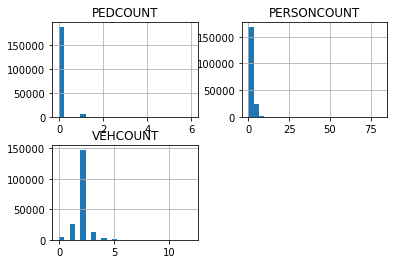

In [83]:
import matplotlib.pyplot as plt
import pylab as pl

viz = df[['VEHCOUNT','PERSONCOUNT','PEDCOUNT']]
viz.hist(bins=25)
plt.show()

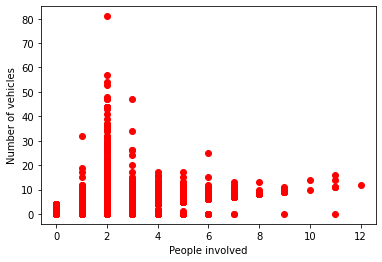

In [84]:
plt.scatter(df.VEHCOUNT, df.PERSONCOUNT,  color='red')
plt.xlabel("People involved")
plt.ylabel("Number of vehicles")
plt.show()

In [85]:
print("From data the number of accidents with people injured is:")
print ((df['SEVERITYCODE'] == 2).sum())
print("From data the number of accidents with only property damages is:")
print ((df['SEVERITYCODE'] == 1).sum())

print("The percentage of people injured after a car accident according to data is:")
print ((df['SEVERITYCODE'] == 2).sum()/194673*100,"%") 

From data the number of accidents with people injured is:
58188
From data the number of accidents with only property damages is:
136485
The percentage of people injured after a car accident according to data is:
29.890123437764863 %


From these simple research we obtain some interesting data, almost 29% of the accidents result in people injured. The majority of the accidents are being caused by 2 people and mostly 2 vehicles. And finally, pedrastians are scarcely involved in car accidents.

## 3. Methodology <a name="methodology"></a>

In this project we will direct our efforts on creating a model able to predict severity of a car accident with certain conditions. These conditions will be: Speeding (T/F) ['SPEEDING'], Type of accident (matched or not) ['STATUS'], Kind of crash ['ADDRTYPE'], light conditions ['LIGHTCOND'], alcohol influence in the accident ['UNDERINFL'], road condition ['ROADCOND'], number of vehicles in the accident ['VEHCOUNT'], people in the accident ['PERSONCOUNT'], the pedrastians involved ['PEDCOUNT'] and weather conditions ['WEATHER']. With this data and the dataframe of almost 20000 elements we will define a model able to predict the severity of the cases:
* Injury collision: In this type of car accident there have been people injured.
* Property damage, only collision: In this kind of car accident there have not been people injured, just property damage.

In first step we have collected the required data and we have filtered and prepared it. We have changed some data types and also deleted those attributes non necessary. After that **we evaluate some of the relationships between the attributes thanks to simple linear regressions**.

The second step is our analysis. In this part we develop our **models** with the training set (we divide the dataframe into training set and test set): **a multiple linear regression and a tree decission model**. 

In the third phase the results of those two models will be compared thanks to an **accuracy score**, also the **ROC curve will show the performance of the models**.

Finally, the study will show certain conclussions.

## 4. Analysis <a name="analysis"></a>

In this section we first define how we are going to treat with the dataframe. It will be dividing into different sets: for training (60% of Data), testin the model (20%) and finally evaluation of the model (20%).

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Defining independent Variables
X=df[['SPEEDING','STATUS','ADDRTYPE', 'LIGHTCOND','UNDERINFL','ROADCOND','VEHCOUNT','PERSONCOUNT','PEDCOUNT','WEATHER']]
# Defininig the dependent Variable
Y=df[['SEVERITYCODE']].copy()

# Obtaining the 20% of test set and the 80% of the training set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
print('Size of training set:', X_train.shape[0])
print('Size of test set:', X_test.shape[0])

X.shape

Size of training set: 155738
Size of test set: 38935


(194673, 10)

## 4.1. Decision Tree model <a name="tree"></a>

In this section we create a model based in a Decision tree model. It is very important to highlight that a Decision tree model only works with numerical data. For this reason we **change the dataframe into numerical data thanks to the "preprocessing" library**.

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

features = X_train[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']]

for feature in ['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features = preprocessing.StandardScaler().fit(features).transform(features)
features.shape

(155738, 10)

In [88]:
# Developing Decision Tree model
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(features,Y_train)

predTree = Tree.predict(features)

In [89]:
# Comparison between test set and the predicted set
print (predTree [0:5],predTree.shape)
print (Y_train [0:5],Y_test.shape)

[1 1 1 1 1] (155738,)
        SEVERITYCODE
132668             2
90178              1
20093              1
137141             1
48650              2 (38935, 1)


In [90]:
# Now, we check the Test Set
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

features = X_test[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']]

for feature in ['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features = preprocessing.StandardScaler().fit(features).transform(features)
features.shape

(38935, 10)

In [91]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Evaluating Test Set
predTreeTest = Tree.predict(features)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTreeTest))

DecisionTrees's Accuracy:  0.7347373828175163


In [92]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import recall_score, roc_curve

jaccard_tree = jaccard_score(Y_test, predTreeTest)
f1_score_tree = f1_score(Y_test, predTreeTest, average='weighted')
Accuracy_tree = precision_score(Y_test, predTreeTest, average='weighted')
tree_prec = ['Decision Tree', round(jaccard_tree,5), round(f1_score_tree,5), round(Accuracy_tree,5)]

## 4.2 Logistic regression model <a name="logistic"></a>

In this section we create a model based in a Logistic regression model. It is very important to highlight that a Decision tree model only works with numerical data. For this reason we **change the dataframe into numerical data thanks to the "preprocessing" library**.

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


features = X_train[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']]

for feature in ['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155738 entries, 132668 to 142662
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   UNDERINFL    155738 non-null  int64
 1   SPEEDING     155738 non-null  int64
 2   VEHCOUNT     155738 non-null  int64
 3   PERSONCOUNT  155738 non-null  int64
 4   PEDCOUNT     155738 non-null  int64
 5   STATUS       155738 non-null  int32
 6   ADDRTYPE     155738 non-null  int32
 7   LIGHTCOND    155738 non-null  int32
 8   ROADCOND     155738 non-null  int32
 9   WEATHER      155738 non-null  int32
dtypes: int32(5), int64(5)
memory usage: 10.1 MB


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

x = np.asanyarray(features[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']])
y = np.asanyarray(Y_train[['SEVERITYCODE']])
x = preprocessing.StandardScaler().fit(x).transform(x)

# The model
LR = LogisticRegression(solver='liblinear').fit(x,y)


C:\Users\cnaj4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Now, we test the model with the test set.

In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

features = X_test[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']]

for feature in ['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features.head()

,UNDERINFL,SPEEDING,VEHCOUNT,PERSONCOUNT,PEDCOUNT,STATUS,ADDRTYPE,LIGHTCOND,ROADCOND,WEATHER
13961,1,0,4,26,0,0,2,2,8,6
119609,0,0,4,12,0,0,2,5,0,1
114363,0,0,4,12,0,0,1,5,0,1
1307,1,0,4,12,0,0,1,2,0,1
40496,1,0,4,22,0,0,1,6,0,4


In [96]:
yhat = LR.predict(features[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']])
y = (Y_test[['SEVERITYCODE']])
yhat = np.asanyarray(yhat)
y = np.asanyarray(y).T

yhat.shape

(38935,)

In [97]:
y=np.delete(y, 0)
y=np.insert(y, 1,0)

In [98]:
y.shape

(38935,)

## 5. Results and Discussion <a name="results"></a>

In this section the accuracy results of the models are presented. Also, the models are evaluated with a specific case.

In [172]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, yhat)

jaccard_log =jaccard_score(y, yhat, average='weighted')
f1_score_log = f1_score(y, yhat, average='weighted')
Accuracy_log = precision_score(y, yhat, average='weighted')
log_prec = ['Logistic Regression', round(jaccard_log,5), round(f1_score_log,5), round(Accuracy_log,5)]

C:\Users\cnaj4\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
Accuracy=pd.DataFrame(data=np.array([tree_prec, log_prec]), columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
Accuracy

,Algorithm,Jaccard,F1-score,Precision
0,Decision Tree,0.72002,0.67296,0.72992
1,Logistic Regression,0.15318,0.25598,0.59497


From this table we can conclude that the Decision Tree model has a better score than the Logistic Regression model.

### Evaluating the models with 10 random values from the Data Set.

Now we evaluate the model selecting some random rows from the original Dataframe and then we compare the results.

In [209]:
# Selecting a random row
dfEv = df.loc[np.random.choice(df.index, size=10)]
dfEv.head(3)

,SEVERITYCODE,LON,LAT,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
45181,1,-122.303753,47.617643,50642,64489,64489,2623497,Matched,Block,29973.0,22ND AVE BETWEEN E OLIVE ST AND E MADISON ST,1,Property Damage Only Collision,Parked Car,3,0,0,2,2007/08/07 00:00:00+00,8/7/2007,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",1,Overcast,Dry,Daylight,7219014.0,0,32,One parked--one moving,0,0,N
121018,1,-122.296231,47.610010,134498,149714,149734,3606511,Matched,Intersection,30046.0,M L KING JR WAY AND E MARION ST,1,Property Damage Only Collision,Other,1,0,0,1,2013/07/05 00:00:00+00,7/5/2013 10:00:00 PM,At Intersection (intersection related),26,MOTOR VEHICLE STRUCK OBJECT IN ROAD,0,Clear,Dry,Dark - Street Lights On,4116034.0,0,50,Fixed object,0,0,N
100247,1,-122.363997,47.664383,110216,125027,125027,3206271,Matched,Intersection,25349.0,6TH AVE NW AND NW 49TH ST,1,Property Damage Only Collision,Angles,2,0,0,2,2011/08/26 00:00:00+00,8/26/2011 8:55:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,Clear,Dry,Dark - Street Lights On,11238005.0,0,10,Entering at angle,0,0,N


In [210]:
# Transforming the random 10 values into numerical for evaluation
features = dfEv[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']]

for feature in ['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

yEv = (dfEv[['SEVERITYCODE']])
features.head()

<ipython-input-210-5a0cb53d4120>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = features[feature].astype('|S')
<ipython-input-210-5a0cb53d4120>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = LabelEncoder().fit_transform(features[feature])


,UNDERINFL,SPEEDING,VEHCOUNT,PERSONCOUNT,PEDCOUNT,STATUS,ADDRTYPE,LIGHTCOND,ROADCOND,WEATHER
45181,1,0,1,2,0,0,0,1,0,1
121018,0,0,0,0,0,0,1,0,0,0
100247,1,0,1,1,0,0,1,0,0,0
42411,1,1,2,2,0,0,0,2,1,1
162275,0,0,1,1,0,0,1,1,0,1


In [211]:
yhatEv = LR.predict(features[['UNDERINFL','SPEEDING','VEHCOUNT','PERSONCOUNT','PEDCOUNT','STATUS','ADDRTYPE', 'LIGHTCOND','ROADCOND','WEATHER']])
predTreeTestEv = Tree.predict(features)

In [212]:
yEv = np.asanyarray(yEv)
yEv=np.transpose(yEv)
yEv

array([[1, 1, 1, 1, 1, 1, 2, 1, 2, 1]], dtype=int64)

### Comparison between models and real life Severity Code

In [213]:
print(' Real Severity Code ', yEv)
print(' LogReg Severity Code', yhatEv)
print('DecTree Severity Code', predTreeTestEv)

 Real Severity Code  [[1 1 1 1 1 1 2 1 2 1]]
 LogReg Severity Code [1 1 1 1 1 1 2 1 1 1]
DecTree Severity Code [1 1 1 1 1 1 1 1 1 1]


Thanks to the previous Evaluation we can conclude with a small demostration that the models present a good detection of whether an accident is going to happen.

## 6. Conclusion <a name="conclusion"></a>

The models developed present a good enough accuracy in terms of predicting whether or not an accident is going to happen. The global accuracy of the models is high. 

However, **the models do not present accuracy enough in terms of predicting whether or not an accident is severe with some people injured or not**. In certain cases (such as the presented in the comparison), the models consider an accident as less harmful than what has been in reality.

For the reasons mentioned above it can be concluded that even when the data length is sufficient, **the attributes presented in the Dataframe are not enough to predict accurately the possible severity of an accident**. To all the mentioned attributes in the data, it is highly recommendable to add **age of the drivers, if the cars have or not the technical inspection passed, if distractions were committed by the drivers, license expirations...**.

For a further analysis and deeper analysis this data attributes if added may result in a better accuracy of the model. 